# Ecommerce: Amazon Purchases

This notebook investigates the rise of online shopping during the pandemic by looking at Amazon's stock performance and the most popular product categories on Amazon. My analysis will compare these retail trends with the trends in Covid-19 cases in the United States.  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## How did the pandemic affect Amazon's stock performance?

This dataset from Yahoo Finance contains the stock performance for Amazon from February to April. The data is by week. We would expect the stock to increase in value with time as the Pandemic continues. 

#### Clean data and plot stock highs against date 

<AxesSubplot:title={'center':'Amazon Stock Highs, from February to April'}, xlabel='Date', ylabel='Stock Price ($)'>

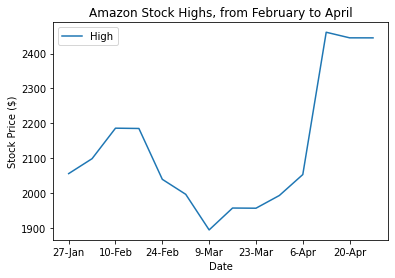

In [2]:
stock_data = pd.read_csv('../data/amzn_stock.csv')
stock_clean = stock_data[['Date', 'High']]
stock_clean=stock_clean.set_index('Date')
stock_clean.plot(title="Amazon Stock Highs, from February to April", ylabel="Stock Price ($)", xlabel="Date")

Here we see Amazon's stock had a gradual increase from the start of the pandemic, then a drastic increase around April, one month into the pandemic. 

## How did the pandemic affect Amazon purchasing habits? 

This dataset provides a bit more detailed data on shopping behavior. For example, it specifies a typical 'grocery' purchase seen in the retail dataset into categories such as "food or beverage", "pet products", and "household supplies". 

First, I clean the data and transpose the dataset so I can rename the columns as the product categories.

In [3]:
amazon_data = pd.read_csv('../data/amazon_purchase_categories.csv')

amazon_data.shape
amazon_data = amazon_data.drop(amazon_data.columns[3], axis=1)
 #transpose so categories are columns
amazon_data = amazon_data.transpose()
# add shorter category labels
amazon_data.columns = ["Clothing", "Pharmacy", "Food", "Household", "Entertainment", "Pet Supplies", "Office Supplies", "Toys", "Electronics", "Sporting Goods", "Home", "Baby", "Tobacco", "Other"]
# drop row with long category labels 
amazon_data = amazon_data[1:]
#transpose back to original
amazon_data = amazon_data.transpose()


Now that the dataset is in better shape, I can plot the trends in purchases for February and April 2020.

Text(0.5, 0, 'Percent of Purchases Including Product Category')

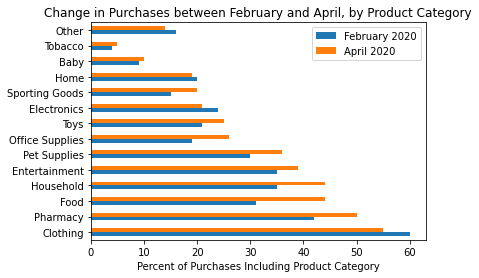

In [4]:
amazon_data.plot.barh(title="Change in Purchases between February and April, by Product Category")
plt.xlabel("Percent of Purchases Including Product Category")

Clothing and Pharmacy were the top product categories prior to and during the pandemic. Food and household became more popular product categories during the pandemic. 

## What product categories on Amazon saw the largest change in purchases?

Calculate percent change for each product category

In [5]:
amazon_data['Change'] = ((amazon_data['April 2020'] - amazon_data['February 2020']) / amazon_data['February 2020']) *100
amazon_data = amazon_data.sort_values(by='Change', ascending=False)
amazon_data

,February 2020,April 2020,Change
Food,31,44,41.9355
Office Supplies,19,26,36.8421
Sporting Goods,15,20,33.3333
Household,35,44,25.7143
Tobacco,4,5,25
Pet Supplies,30,36,20
Pharmacy,42,50,19.0476
Toys,21,25,19.0476
Entertainment,35,39,11.4286
Baby,9,10,11.1111


Tobacco, Baby, Other, and Home have fairly insignificant changes (1%) and they originally had low values. Let's drop these 4 rows.  

In [6]:
amazon_data = amazon_data.drop(['Tobacco', 'Baby', 'Other', 'Home'])
amazon_data

,February 2020,April 2020,Change
Food,31,44,41.9355
Office Supplies,19,26,36.8421
Sporting Goods,15,20,33.3333
Household,35,44,25.7143
Pet Supplies,30,36,20
Pharmacy,42,50,19.0476
Toys,21,25,19.0476
Entertainment,35,39,11.4286
Clothing,60,55,-8.33333
Electronics,24,21,-12.5


Plot percent change for each product category 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Food'),
  Text(1, 0, 'Office Supplies'),
  Text(2, 0, 'Sporting Goods'),
  Text(3, 0, 'Household'),
  Text(4, 0, 'Pet Supplies'),
  Text(5, 0, 'Pharmacy'),
  Text(6, 0, 'Toys'),
  Text(7, 0, 'Entertainment'),
  Text(8, 0, 'Clothing'),
  Text(9, 0, 'Electronics')])

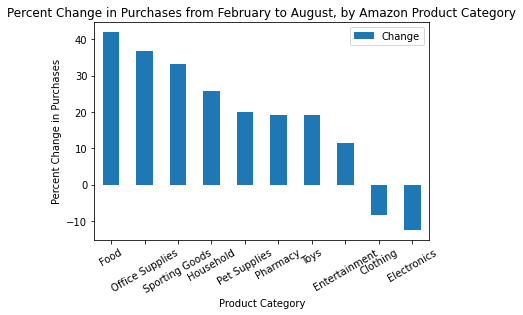

In [7]:
amazon_data.sort_values(by="Change",ascending=False).plot(kind='bar', y="Change", ylabel="Percent Change in Purchases", xlabel="Product Category", title="Percent Change in Purchases from February to August, by Amazon Product Category")

plt.xticks(rotation=30)

From this plot, we see that food and office supplies had the greatest increase in # of buyers, and clothing and electronics had the biggest decreases. This makes sense as food and office supplies were more essential than clothing and electronics. People were focused on adapting to working from home and making sure they had enough food in the house since it was unsafe to go to restaurants. 